In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.signal import find_peaks
try: import sounddevice as sd
except: print('Biblioteca sounddevice não encontrada, os sons não serão tocados')
pickle_file=open('sounds.pickle','rb')
sounds=pickle.load(pickle_file)
pickle_file.close()

# Análise do espectro de Fourier
As séries de Fourier são "receitas" de como construir um sinal periódico como uma soma de senóides. Desta forma, podemos através dos coeficientes da série determinar quais são as frequências que estão mais presentes na composição de um sinal.
Nesse notebook, vamos analisar as frequências presentes nas notas de alguns instrumentos. Os coeficientes da série de Fourier serão calculados usando a FFT, que será vista mais tarde no curso.

## Senóide pura
O exemplo mais trivial disso é a análise de uma senóide pura, ou pelo menos o que se espera que seja uma senóide pura.  O exemplo abaixo é a gravação de um Lá (440 Hz) tocado por um diapasão. 

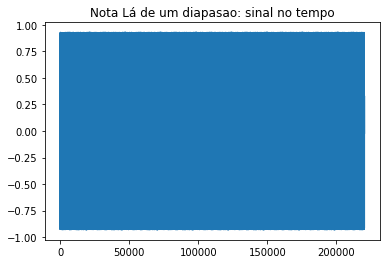

In [2]:
diapasao=np.array(sounds[0])
diapasao=diapasao[:,0]
fs=sounds[5]
try: sd.play(diapasao,fs)
except: pass
plt.title('Nota Lá de um diapasao: sinal no tempo')
plt.plot(diapasao);

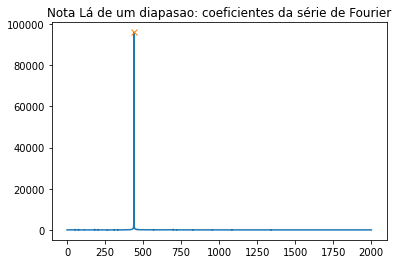

In [3]:
diapasao_fft=np.fft.fft(diapasao)
x=np.linspace(0,44100/2,len(diapasao)//2)
y=np.abs(diapasao_fft[:len(diapasao_fft)//2])
plt.plot(x[:10000],y[:10000])
p=find_peaks(y[:10000],height=400,distance=100)
p=p[0]
plt.title('Nota Lá de um diapasao: coeficientes da série de Fourier')
plt.plot(x[p],y[p],'x');

Observando os coeficientes observamos que esse sinal é composto quase exclusivamente por uma senóide de 440 Hz, ou seja, um tom puro de Lá.

## Análise espectral: Piano
O som do diapasão, apesar de uma nota pura, soa extremamente artificial justamente porque seu espectro é "limpo" demais - não há contribuição de outras frequências senão 440 Hz. Um Lá de piano como o exemplo abaixo soa bem mais natural.

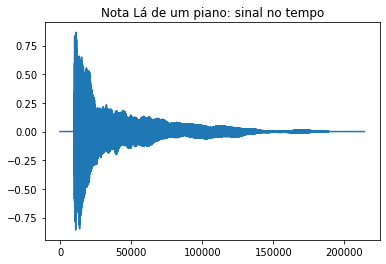

In [4]:
piano_data=np.array(sounds[1])
piano_data=piano_data[:,0]
try: sd.play(piano_data,fs)
except: pass
plt.title('Nota Lá de um piano: sinal no tempo')
plt.plot(piano_data);

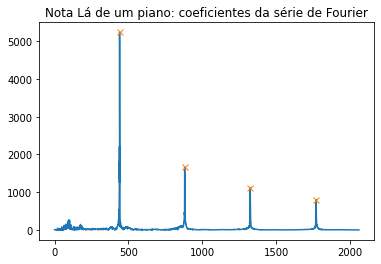

In [5]:
piano_fft=np.fft.fft(piano_data)
x=np.linspace(0,44100/2,len(piano_fft)//2)
y=np.abs(piano_fft[:len(piano_fft)//2])
plt.plot(x[:10000],y[:10000])
p=find_peaks(y[:10000],height=400,distance=100)
p=p[0]
plt.title('Nota Lá de um piano: coeficientes da série de Fourier')
plt.plot(x[p],y[p],'x');

In [6]:
print(x[p])

[ 440.35296756  880.91199641 1324.76800583 1771.09675068]


Na célula acima são mostradas as frequências mais importantes na composição do sinal do piano. Observamos que apesar de a principal componente do sinal é o Lá de 440 Hz, existem outras frequências que também estão presentes.
Observe que as frequências presentes inteiros da frequência fundamental, que correspondem às suas harmônicas.
Essa cacterística de preenchimento do espectro quando tocamos uma nota dá o timbre do instrumento, e é um dos motivos pelo qual um Lá de piano soa diferente de um Lá de violão,por exemplo.

Podemos observar também acordes, que são conjuntos harmônicos de mais de uma nota tocadas juntas. O acorde de Lá maior é formado pelas notas Lá, Mi e Dó sustenido.

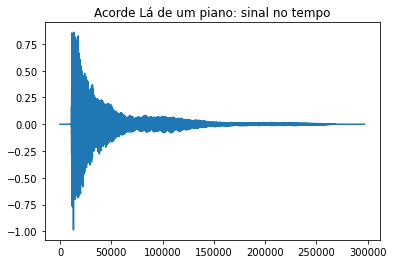

In [7]:
piano_acorde=np.array(sounds[2])
piano_acorde=piano_acorde[:,0]
try: sd.play(piano_acorde,fs)
except: pass
plt.title('Acorde Lá de um piano: sinal no tempo')
plt.plot(piano_acorde);

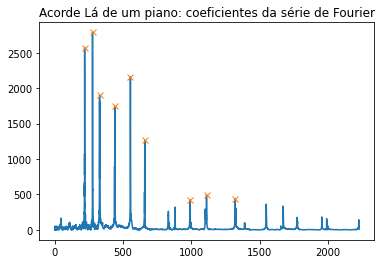

In [14]:
pianoac_fft=np.fft.fft(piano_acorde)
x=np.linspace(0,44100/2,len(pianoac_fft)//2)
y=np.abs(pianoac_fft[:len(pianoac_fft)//2])
plt.plot(x[:15000],y[:15000])
p=find_peaks(y[:15000],height=400,distance=100)
p=p[0]
plt.title('Acorde Lá de um piano: coeficientes da série de Fourier')
plt.plot(x[p],y[p],'x');

O espectro de Fourier do acorde é muito mais preenchido que o do nota Lá sozinha, no entanto, observamos que as componentes presentes com maior intensidade correspondem às notas que compõe o acorde tocado e suas harmônicas.
Que nota cada frequência corresponde pode ser visto aqui: https://en.wikipedia.org/wiki/Piano_key_frequencies 

In [9]:
print(x[p])

[ 219.34313943  276.96340897  328.79195038  439.87432566  554.37233548
  659.2174651   989.19746227 1111.2692704  1321.55355303]


## Análise espectral: Violão
Podemos fazer a mesma análise em um acorde de violão

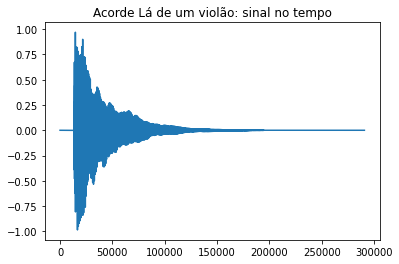

In [10]:
violao_data=np.array(sounds[3])
violao_data=violao_data[:,0]
try: sd.play(violao_data,fs)
except: pass
plt.title('Acorde Lá de um violão: sinal no tempo')
plt.plot(violao_data);

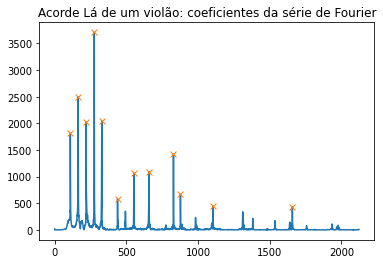

In [11]:
violao_fft=np.fft.fft(violao_data)
x=np.linspace(0,44100/2,len(violao_fft)//2)
y=np.abs(violao_fft[:len(violao_fft)//2])
plt.plot(x[:14000],y[:14000])
p=find_peaks(y[:14000],height=400,distance=100)
p=p[0]
plt.title('Acorde Lá de um violão: coeficientes da série de Fourier')
plt.plot(x[p],y[p],'x');

In [13]:
print(x[p])

[ 109.18318925  163.62314056  219.57952506  276.29412614  330.12750418
  438.55247684  552.43660897  657.98035858  828.57909179  877.256597
 1104.87321793 1657.91640017]


O espectro de Fourier do acorde é muito mais preenchido que o do piano, aparecem outras componentes espectrais, no entanto todas correspondem às mesmas notas que encontramos no acorde de piano. A intensidade que cada componente contribui para a composição do som também é diferente. Tudo isso contribui para o que ouvimos seja totalmente diferente, apesar de ser exatemente o mesmo acorde.

## Análise espectral: Violino
Por último, vamos olhar o espctro de um Lá de violino

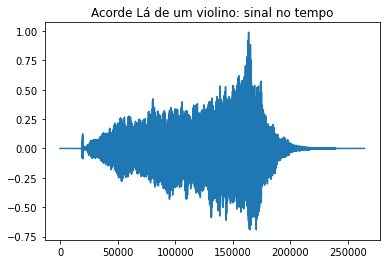

In [12]:
violino_data=np.array(sounds[4])
violino_data=violino_data[:,0]
try: sd.play(violino_data,fs)
except: pass
plt.title('Acorde Lá de um violino: sinal no tempo')
plt.plot(violino_data);

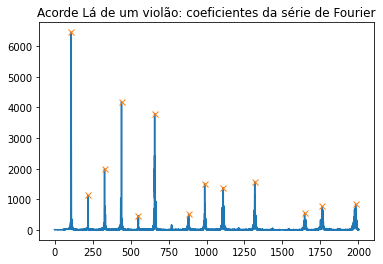

In [14]:
violino_fft=np.fft.fft(violino_data)
x=np.linspace(0,44100/2,len(violino_fft)//2)
y=np.abs(violino_fft[:len(violino_fft)//2])
plt.plot(x[:12000],y[:12000])
p=find_peaks(y[:12000],height=400,distance=100)
p=p[0]
plt.title('Acorde Lá de um violão: coeficientes da série de Fourier');
plt.plot(x[p],y[p],'x')

In [15]:
print(x[p])

[ 110.00378515  220.00757031  329.00980355  440.68284189  551.35432832
  658.68730838  882.70108634  987.86403725 1110.220296   1317.37461675
 1645.38286839 1762.0636663  1981.73738597]


Além de picos mais pronunciados e espalhados ao longo do espectro, o sinal do violino tem picos mais largos, com a presença de senoides em torno das frequências puras, o que explica o som mais "complexo" que ouvimos.